In [1]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

In [3]:
df = pd.read_csv('/Users/akankshitadash/Desktop/Programs/MA4199/Task 1/MachineLearning/Code/AdjustedRPKMoutput/TE_chrE_filtered.txt',sep='\t')




In [4]:
df.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.318009,1.243997,1.416672,1.717463,1.757317,-0.074012,0.098663,0.399454,0.439308
1,NM_001003803,ATP5S,1.904575,1.918597,2.401017,2.690534,2.385348,0.014021,0.496441,0.785959,0.480773
2,NM_001003800,BICD2,-0.212253,-0.326054,-0.394399,-0.043000,0.203561,-0.113801,-0.182145,0.169253,0.415814
3,NM_016647,THEM6,0.057710,0.211936,0.366747,0.714460,0.559378,0.154226,0.309037,0.656751,0.501668
4,NM_016640,MRPS30,0.562779,0.555941,0.268715,0.379276,0.831364,-0.006838,-0.294065,-0.183503,0.268585


In [5]:
df.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

In [6]:
df.shape

(5642, 11)

In [35]:
path =  '/Users/akankshitadash/Desktop/TE_chrE_filtered/4/AccNums/'
clusters = [[],[],[],[]]
indices = []
num = ['4']
for i in num: #cluster number
    for j in range(int(i)): #sub-cluster within clusters
        path_load=path+'AccNum'+str(j+1)+'.txt'
        print(path_load)
        f = open(path_load, "r")
        idx=0
        for x in f:
            if(not df.loc[df['AccNum'] == x[:-1]].empty):
                idx+=1
                list_new = df.loc[df['AccNum'] == x[:-1]][['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values[0]
                clusters[int(j)-int(i)].append(list_new)
        indices.append(len(clusters[int(j)-int(i)]))
        print(len(clusters[int(j)-int(i)]),idx)     
        
        

/Users/akankshitadash/Desktop/TE_chrE_filtered/4/AccNums/AccNum1.txt
913 913
/Users/akankshitadash/Desktop/TE_chrE_filtered/4/AccNums/AccNum2.txt
3474 3474
/Users/akankshitadash/Desktop/TE_chrE_filtered/4/AccNums/AccNum3.txt
286 286
/Users/akankshitadash/Desktop/TE_chrE_filtered/4/AccNums/AccNum4.txt
969 969


In [36]:
print(indices)

[913, 3474, 286, 969]


In [37]:
for i in range(1,4):
    indices[i]+=indices[i-1]

In [38]:
print(indices)

[913, 4387, 4673, 5642]


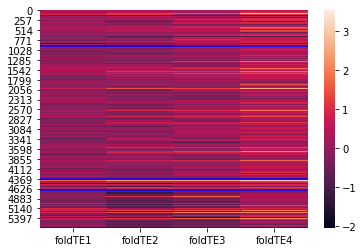

In [39]:
stacked = []
for cluster in clusters:
    for row in cluster:
        stacked.append(row)

ax = sns.heatmap(stacked,xticklabels=['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'])
ax.hlines(indices, *ax.get_xlim(),color='b')
plt.savefig('/Users/akankshitadash/Desktop/TE_chrE_filtered/Heatmap4.png')
plt.show()

In [103]:
# def plot_heatmap(X,idx,indices,path):
#     ax = sns.heatmap(X,xticklabels=['TE0','TE1', 'TE2', 'TE3','TE4'])
#     plt.title('Heatmap'+str(idx))
#     ax.hlines(indices, *ax.get_xlim())
#     plt.savefig(path)
#     plt.show()
    
# for idx,cluster in enumerate(clusters):
#     path = '/Users/akankshitadash/Desktop/Bayesian Networks/TE_chrE/4/'+str(idx+4)
#     plot_heatmap(cluster,idx+4,indices[idx],path)